In [59]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
%matplotlib inline

In [56]:
digits = load_digits()
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

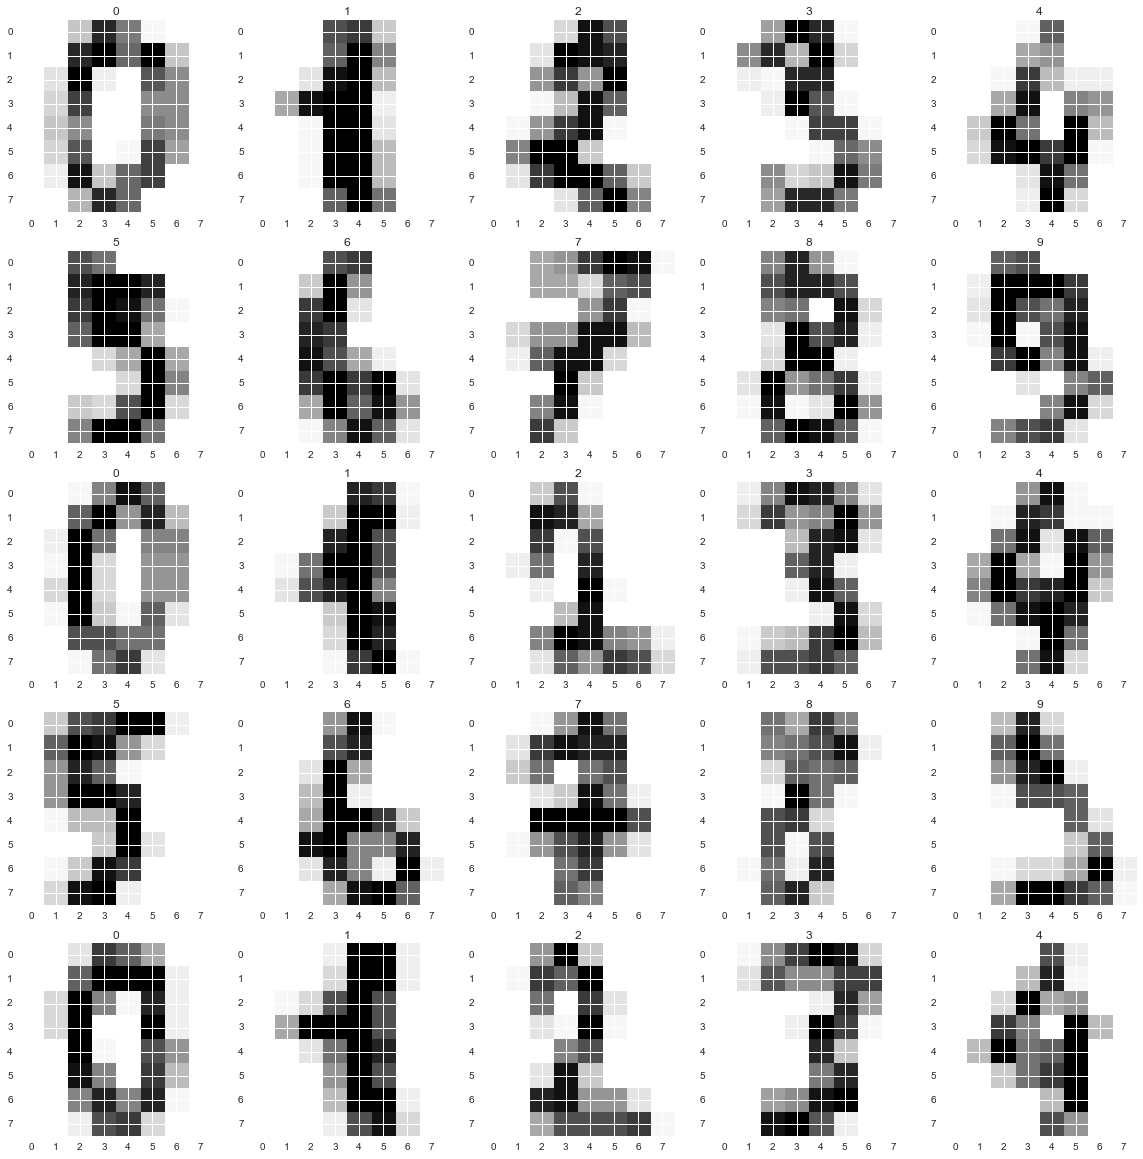

In [57]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
for i in range(5):
    for j in range(5):
        axs[i][j].imshow(digits['images'][5 * i + j], interpolation='nearest')
        axs[i][j].set(title=digits['target'][5 * i + j])

In [58]:
X = digits['data']
y = digits['target']

In [81]:
def write_answer(filename, answer):
    with open(filename, "w") as fin:
        print(answer, file=fin)

In [82]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
scores1 = cross_val_score(clf1, X, y, cv=10, n_jobs=4)
print(scores1.mean())
write_answer("answer1.txt", scores1.mean())

0.820977246514


In [85]:
from sklearn.ensemble import BaggingClassifier
clf2 = BaggingClassifier(n_estimators=100)
scores2 = cross_val_score(clf2, X, y, cv=10, n_jobs=4)
print(scores2.mean())
write_answer("answer2.txt", scores2.mean())

0.924306352391


In [87]:
clf3 = BaggingClassifier(n_estimators=100, max_features=8) # 8 is sqrt(64)
scores3 = cross_val_score(clf3, X, y, cv=10, n_jobs=4)
print(scores3.mean())
write_answer("answer3.txt", scores3.mean())

0.929861664881


In [88]:
clf4 = BaggingClassifier(DecisionTreeClassifier(max_features=8), n_estimators=100) # 8 is sqrt(64)
scores4 = cross_val_score(clf4, X, y, cv=10, n_jobs=4)
print(scores4.mean())
write_answer("answer4.txt", scores4.mean())

0.953922150939


In [89]:
from sklearn.ensemble import RandomForestClassifier
?RandomForestClassifier

In [105]:
clf5 = RandomForestClassifier(n_estimators=100, max_features=8)
scores5 = cross_val_score(clf5, X, y, cv=10, n_jobs=4)
print(scores5.mean())

0.951068117157


In [103]:
!touch "answer5.txt"